<h1 align='center'>Investiție la bursa istorică (Backtesting) folosind SMA(Simple Moving Average) și RSI(Relative Strength Index) + BOLLINGER BANDS (RSIBB)</h1>

<h2 align='justify'>Includerea (importarea) de librării necesare executării programului</h2>

In [1]:
import numpy as np
#Pentru structuri de date de tip tablou si operatii matematice complexe

import pandas as pd
#Pentru manipularea datelor organizate sub forma de tabel precum datele despre o companie

import matplotlib.pyplot as plt
#Pentru reprezentarea grafica a informatiilor

import yfinance as yf
#Obtinerea datelor despre actiuni folosind Yahoo Finance

<h2 align='justify'>Downloadarea datelor despre o companie</h2>
<p align='justify'>&nbsp;&nbsp;&nbsp;&nbsp;Ca exemplu, am folosit datele despre compania AAPL (Apple Inc.)</p>

In [2]:
n = 10 # Pe cati ani se face investitia

n = n * 365 # Transformat in zile

start_date = pd.to_datetime("today") - pd.Timedelta(n, unit='D') # Din prezent scad n ani

start_date = start_date.strftime("%Y-%d-%m") # Formatul necesar pentru yfinance : an/zi/luna

end_date = pd.to_datetime("today").strftime("%Y-%d-%m")
#Nu se vor lua in calcul ultimele 2-3 zile pentru ca nu am Yahoo premium

data = yf.download('AAPL',start = start_date,end = end_date)
#Functia download primeste mai multi parametri printre care simbolul companiei si datele de inceput
#si sfarsit pentru care se realizeaza cautarea informatiilor

data
#Afisarea variabilei

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-07,12.164000,12.448667,12.017333,12.204667,12.204667,172284000
2013-10-08,12.293333,12.395333,11.547333,11.648667,11.648667,206358000
2013-10-09,11.648667,11.666000,10.766667,11.252000,11.252000,229747500
2013-10-10,11.539333,11.716667,11.312667,11.528667,11.528667,133258500
2013-10-11,11.516667,11.952667,11.413333,11.913333,11.913333,124666500
...,...,...,...,...,...,...
2023-05-02,161.880005,165.490005,158.929993,160.309998,160.309998,128259700
2023-05-03,160.009995,165.000000,159.910004,160.610001,160.610001,119728000
2023-05-04,162.710007,162.949997,159.649994,161.199997,161.199997,95108500


<h2 align='center'>Implementarea și reprezentarea grafică a strategiei Moving Average Crossover</h2>
<p></p>

In [3]:
# Descriere:
# Cand media aritmetica mobila pe o perioada mai scurta este sub media aritmetica mobila pe o perioada mai lunga atunci
# se pot cumpara actiuni, altfel se pot vinde actiuni.

<h2 align='justify'>Funcție pentru calcularea SMA (medie aritmetică mobilă)</h2>

In [4]:
def SMA(data, period, column = 'Close'):
    return data[column].rolling(period).mean()

<h2 align='justify'>Adăugarea de noi coloane în structura de date și ștergerea celor utilizate</h2>

In [5]:
data['Short_SMA'] = SMA(data,50)
#Short SMA, adica pe o perioada mai scurta de zile

data['Long_SMA'] = SMA(data,100)
#Long SMA, adica pe o perioada mai lunga de zile

data.drop(columns = ["Open","High","Low","Adj Close", "Volume"], inplace = True)

data

,Close,Short_SMA,Long_SMA
Date,,,
2013-10-07,12.204667,NaN,NaN
2013-10-08,11.648667,NaN,NaN
2013-10-09,11.252000,NaN,NaN
2013-10-10,11.528667,NaN,NaN
2013-10-11,11.913333,NaN,NaN
...,...,...,...
2023-05-02,160.309998,184.6166,169.6051
2023-05-03,160.610001,183.8814,169.4708
2023-05-04,161.199997,183.0882,169.3484


<h2 align="justify">Strategia propriu zisă</h2>

In [6]:
def strategy(data):
    #Listele sunt initial vide.
    buy = []
    sell = []
    sum = []
    s = 1000 # investitia initiala
    nr_actiuni = 0 # numar de actiuni per companie
    for i in range(0, len(data)):
        if data['Short_SMA'][i] < data['Long_SMA'][i] and s > data['Close'][i]:
            # semnal de cumparare
            s = s - data['Close'][i]
            nr_actiuni = nr_actiuni + 1
            buy.append(data['Close'][i])
            sell.append(np.nan)
        elif data['Short_SMA'][i] > data['Long_SMA'][i] and nr_actiuni != 0:
            # semnal de vanzare
            s = s + data['Close'][i]
            nr_actiuni = nr_actiuni - 1
            buy.append(np.nan)
            sell.append(data['Close'][i])
        else:
            buy.append(np.nan)
            sell.append(np.nan)
        sum.append(s + data['Close'][i] * nr_actiuni)
    return (buy, sell, sum)

<h3 align="justify">Adăugarea de informații în structura de date pentru a putea fi reprezentate grafic</h3>
<p align="justify">S-au adăugat atât prețul de cumpărare și de vânzare, cât și suma pe parcursul investițiilor și s-au afișat pe ecran.</p>

In [7]:
strat = strategy(data)
data['Buy'] = strat[0]
data['Sell'] = strat[1]
data['Sum'] = strat[2]

data

,Close,Short_SMA,Long_SMA,Buy,Sell,Sum
Date,,,,,,
2013-10-07,12.204667,NaN,NaN,NaN,NaN,1000.000000
2013-10-08,11.648667,NaN,NaN,NaN,NaN,1000.000000
2013-10-09,11.252000,NaN,NaN,NaN,NaN,1000.000000
2013-10-10,11.528667,NaN,NaN,NaN,NaN,1000.000000
2013-10-11,11.913333,NaN,NaN,NaN,NaN,1000.000000
...,...,...,...,...,...,...
2023-05-02,160.309998,184.6166,169.6051,NaN,NaN,1946.490035
2023-05-03,160.610001,183.8814,169.4708,NaN,NaN,1946.490035
2023-05-04,161.199997,183.0882,169.3484,NaN,NaN,1946.490035


<h2 align="justify">Reprezentarea grafică</h2>

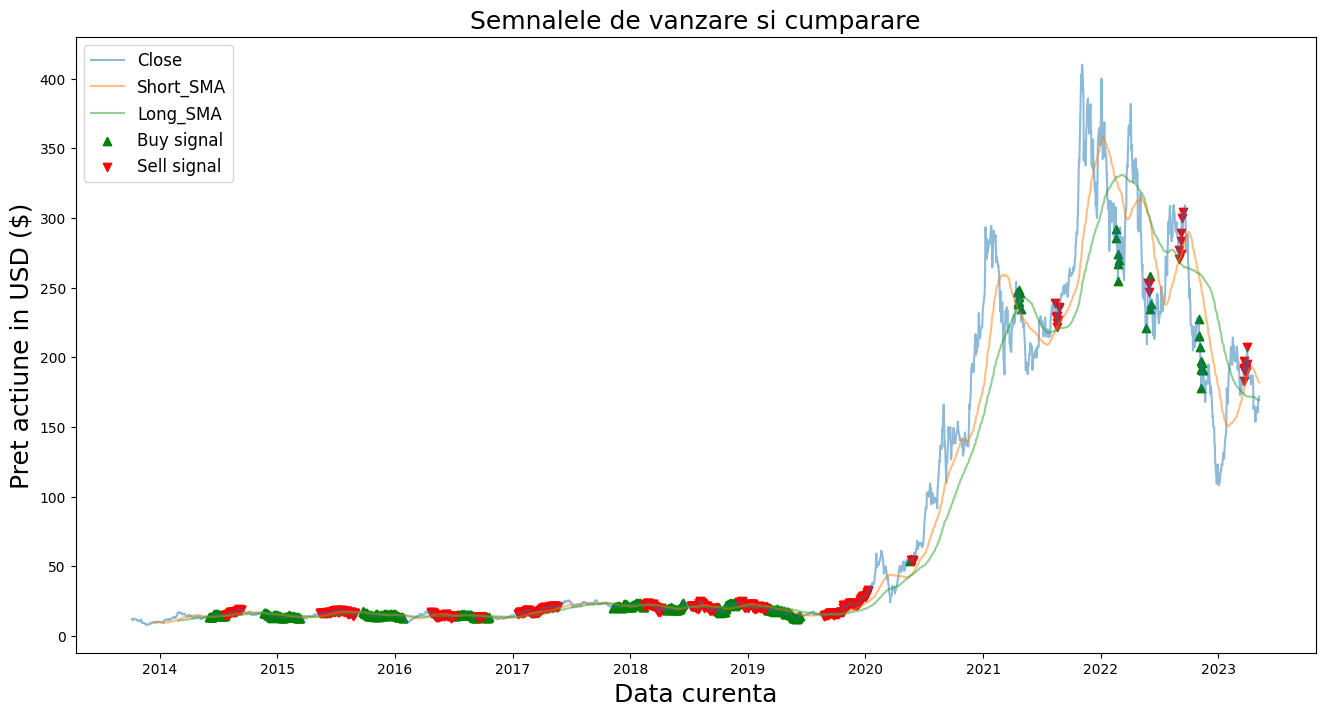

In [8]:
plt.figure(figsize = (16, 8))
plt.plot(data['Close'],alpha = 0.5,label = 'Close')
plt.plot(data['Short_SMA'],alpha = 0.5,label = 'Short_SMA')
plt.plot(data['Long_SMA'],alpha = 0.5,label = 'Long_SMA')
plt.scatter(data.index,data['Buy'],color = 'green',label = 'Buy signal', marker = '^',alpha = 1)
plt.scatter(data.index,data['Sell'],color = 'red',label = 'Sell signal',marker = 'v',alpha = 1)
plt.title("Semnalele de vanzare si cumparare",fontsize = 18)
plt.xlabel("Data curenta",fontsize = 18)
plt.ylabel("Pret actiune in USD ($)",fontsize = 18)
plt.legend(loc = "upper left",fontsize = 12)
plt.show()

<h2 align="justify">Afișarea rezultatelor strategiei SMA Crossover</h2>

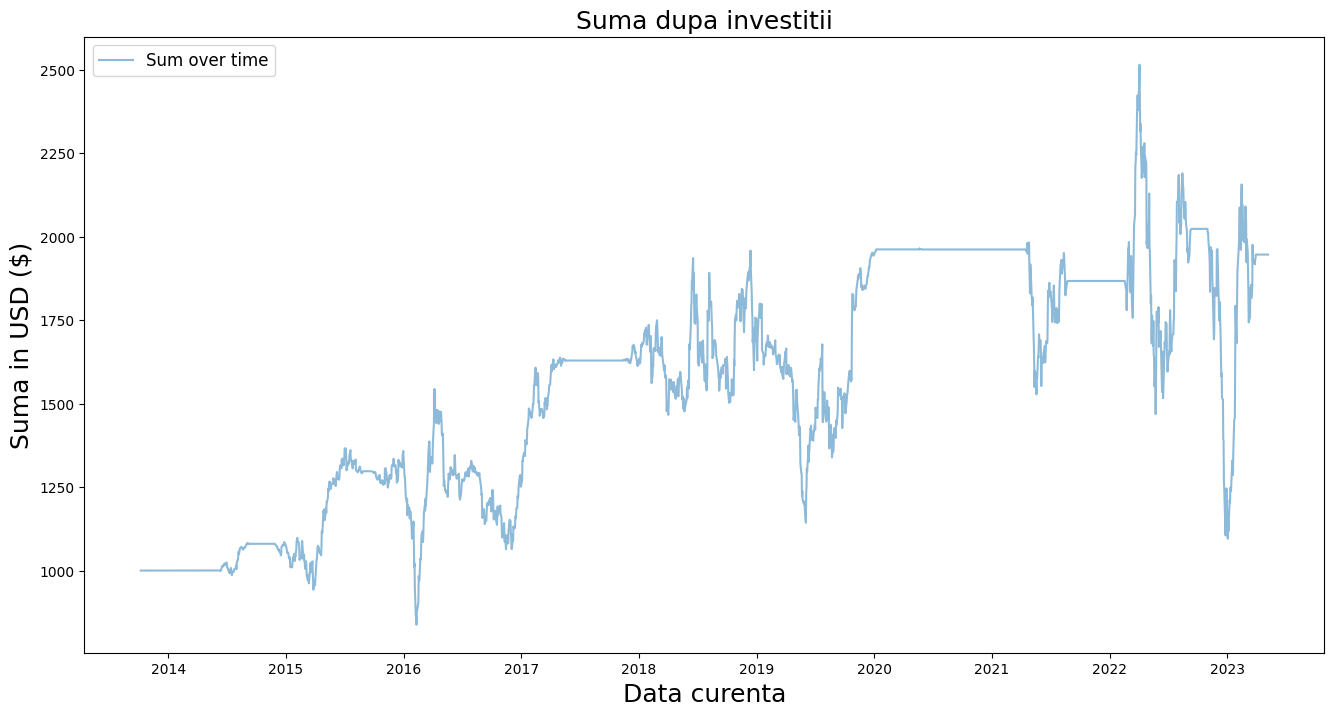

Suma maxima pe parcursul investitiilor: 2515.18 $
Suma minima pe parcursul investitiilor: 837.77 $
Suma totala dupa toate investitiile este: 1946.49 $


In [9]:
plt.figure(figsize = (16, 8))
plt.plot(data['Sum'],alpha = 0.5, label = 'Sum over time')
plt.title("Suma dupa investitii",fontsize = 18)
plt.xlabel("Data curenta",fontsize = 18)
plt.ylabel("Suma in USD ($)",fontsize = 18)
plt.legend(loc = "upper left",fontsize = 12)
plt.show()
maxim_sma = data['Sum'][0]
minim_sma = data['Sum'][0]
for i in range(0,len(data)):
    if(maxim_sma > data['Sum'][i]):
        maxim_sma = data['Sum'][i]
    if(minim_sma < data['Sum'][i]):
        minim_sma = data['Sum'][i]
total_sma = data['Sum'][len(data)-1]
#Afisarea rezultatelor cu doua zecimale
#Aceste sume includ si valorile actiunilor detinute
print(f"Suma maxima pe parcursul investitiilor: {format(minim_sma,'.2f')} $")
print(f"Suma minima pe parcursul investitiilor: {format(maxim_sma,'.2f')} $")
print(f"Suma totala dupa toate investitiile este: {format(total_sma,'.2f')} $")

<h2 align="center">Implementarea și reprezentarea grafică a strategiei RSI + BB</h2>

In [10]:
# Descriere:
# Cand RSI este Oversold si ne aflam sub LowerBand se pot cumpara actiuni, altfel daca RSI este Overbought si ne aflam
# peste UpperBand se pot vinde actiuni

<h2 align="justify">Funcție pentru calcularea Bollinger Bands</h2>
<p>&nbsp;&nbsp;&nbsp;&nbsp;În esență, Bollinger Bands (benzi Bollinger) sunt medii aritmetice cărora li s-a adăugat / scăzut standard deviation (abatere standard pentru minimizarea riscului)</p>

In [11]:
def bollinger_bands(data, period):
    rolling_mean = data['Close'].rolling(period).mean() # SMA
    rolling_std = data['Close'].rolling(period).std() # Standard deviation
    data['UpperBand'] = rolling_mean + (2 * rolling_std)
    data['LowerBand'] = rolling_mean - (2 * rolling_std)
    return data


<h2 align="justify">Funcție pentru calcularea RSI(Relative Strength Index)</h2>
<p>&nbsp;&nbsp;&nbsp;&nbsp;Indicele de putere relativă măsoară viteza și amploarea mișcărilor prețului unei acțiuni</p>

In [12]:
def RSI(data, period):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = delta.where(delta < 0, 0)
    avg_gain = gain.rolling(period).mean()
    avg_loss = loss.rolling(period).mean()
    RS = avg_gain / avg_loss
    RSI = 100 - (100 / (1 + RS))
    data['RSI'] = RSI
    data['Overbought'] = 70
    data['Oversold'] = 30
    return data

<h2 align="justify">Apelul funcțiilor pentru a crea noi coloane în structura de date</h2>

In [13]:
data = bollinger_bands(data, 30)

data = RSI(data, 13)

<h2 align="justify">Strategia propriu zisă</h2>

In [14]:
def RSIBBstrategy(data):
    #Listele sunt initial vide
    buy = []
    sell = []
    sum = []
    s = 1000 # investitia initiala
    nr_actiuni = 0 # numar de actiuni per companie
    for i in range(0,len(data)):
        if data['Close'][i] < data['LowerBand'][i] and data['RSI'][i] < data['Oversold'][i] and s > data['Close'][i]:
            #semnal de cumparare
            s = s - data['Close'][i]
            nr_actiuni = nr_actiuni + 1
            buy.append(data['Close'][i])
            sell.append(np.nan)
        elif data['Close'][i] > data['UpperBand'][i] and data['RSI'][i] > data['Overbought'][i] and nr_actiuni != 0:
            #semnal de vanzare
            s = s + data['Close'][i]
            nr_actiuni = nr_actiuni - 1
            buy.append(np.nan)
            sell.append(data['Close'][i])
        else:
            buy.append(np.nan)
            sell.append(np.nan)
        sum.append(s + data['Close'][i] * nr_actiuni)
    return (buy, sell, sum)

<h3 align="justify">Adăugarea de informații în structura de date pentru a putea fi reprezentate grafic</h3>
<p align="justify">S-au adăugat atât prețul de cumpărare și de vânzare, cât și suma pe parcursul investițiilor și s-au afișat pe ecran.</p>

In [15]:
strat = RSIBBstrategy(data)

data['RSIBB_Buy'] = strat[0]
data['RSIBB_Sell'] = strat[1]
data['RSIBB_Sum'] = strat[2]

data

,Close,Short_SMA,Long_SMA,Buy,Sell,Sum,UpperBand,LowerBand,RSI,Overbought,Oversold,RSIBB_Buy,RSIBB_Sell,RSIBB_Sum
Date,,,,,,,,,,,,,,
2013-10-07,12.204667,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,70,30,NaN,NaN,1000.000000
2013-10-08,11.648667,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,70,30,NaN,NaN,1000.000000
2013-10-09,11.252000,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,70,30,NaN,NaN,1000.000000
2013-10-10,11.528667,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,70,30,NaN,NaN,1000.000000
2013-10-11,11.913333,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,70,30,NaN,NaN,1000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-02,160.309998,184.6166,169.6051,NaN,NaN,1946.490035,209.687815,152.530184,-57.405195,70,30,NaN,NaN,1590.859947
2023-05-03,160.610001,183.8814,169.4708,NaN,NaN,1946.490035,208.703818,151.049515,-61.459576,70,30,NaN,NaN,1593.259972
2023-05-04,161.199997,183.0882,169.3484,NaN,NaN,1946.490035,208.160819,149.595847,-52.399362,70,30,NaN,NaN,1597.979942


<h2 align="justify">Reprezentarea grafică</h2>

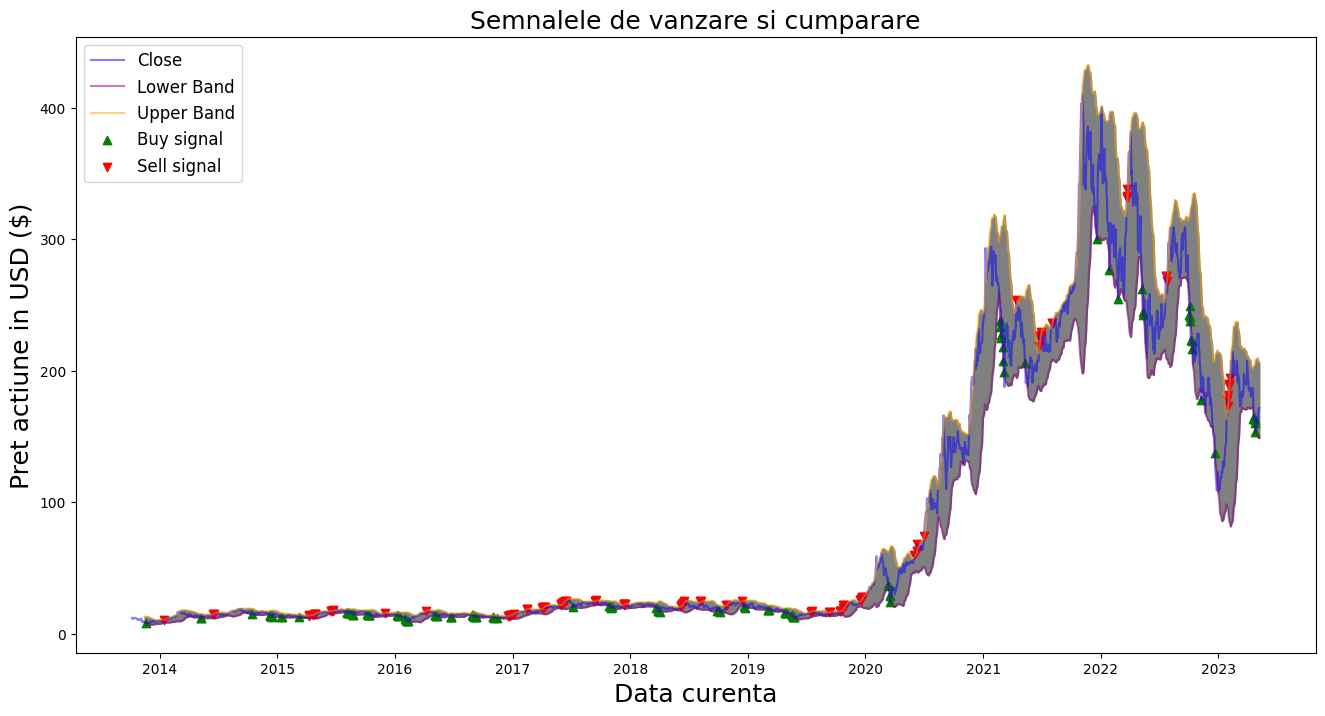

In [16]:
plt.figure(figsize = (16, 8))
plt.plot(data['Close'],alpha = 0.5,label = 'Close',color = 'blue')
plt.plot(data['LowerBand'],alpha = 0.5,label = 'Lower Band',color = 'purple')
plt.plot(data['UpperBand'],alpha = 0.5,label = 'Upper Band',color = 'orange')
plt.fill_between(data.index, data['UpperBand'],data['LowerBand'],color = 'grey')
plt.scatter(data.index,data['RSIBB_Buy'],color = 'green',label = 'Buy signal', marker = '^',alpha = 1)
plt.scatter(data.index,data['RSIBB_Sell'],color = 'red',label = 'Sell signal',marker = 'v',alpha = 1)
plt.title("Semnalele de vanzare si cumparare",fontsize = 18)
plt.xlabel("Data curenta",fontsize = 18)
plt.ylabel("Pret actiune in USD ($)", fontsize = 18)
plt.legend(loc = "upper left",fontsize = 12)
plt.show()

<h2 align="justify">Afișarea rezultatelor strategiei RSI + BB</h2>

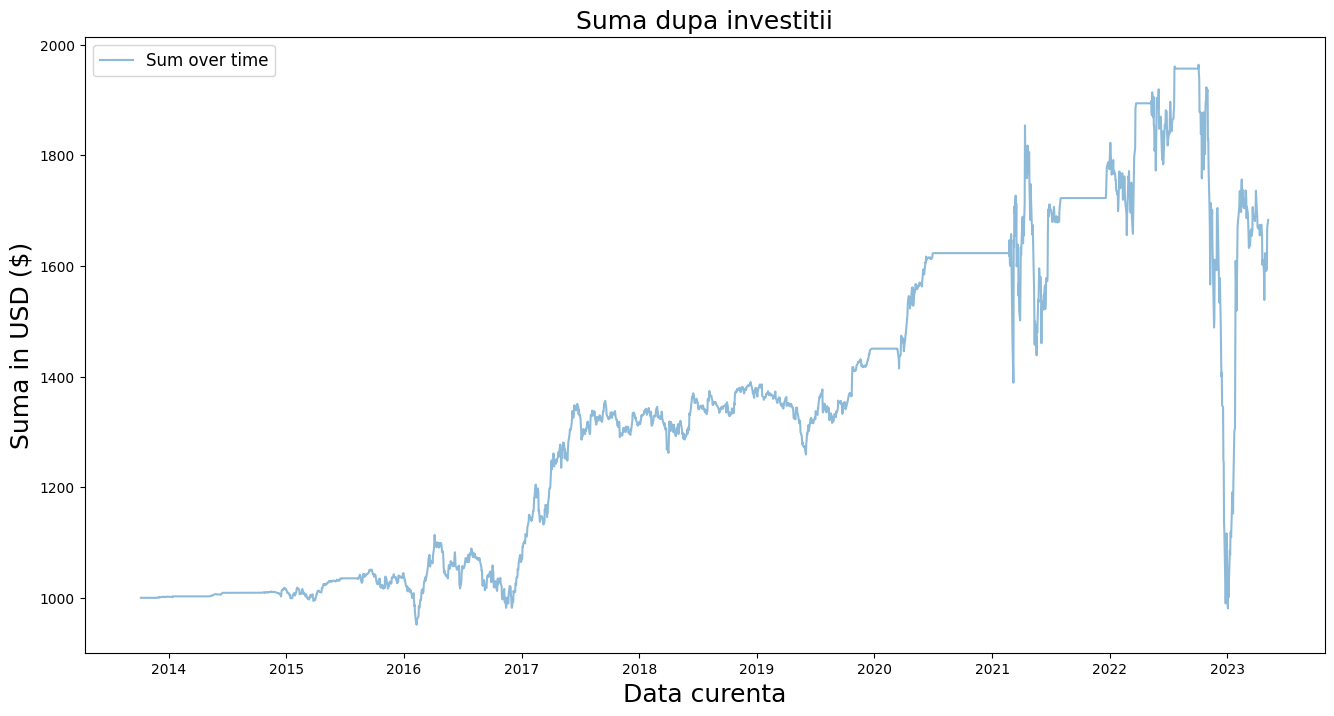

Suma maxima pe parcursul investitiilor: 1963.62 $
Suma minima pe parcursul investitiilor: 951.34 $
Suma totala dupa toate investitiile este: 1683.10 $


In [17]:
plt.figure(figsize = (16, 8))
plt.plot(data['RSIBB_Sum'],alpha = 0.5, label = 'Sum over time')
plt.title("Suma dupa investitii",fontsize = 18)
plt.xlabel("Data curenta",fontsize = 18)
plt.ylabel("Suma in USD ($)",fontsize = 18)
plt.legend(loc = "upper left",fontsize = 12)
plt.show()
maxim_rsibb = data['RSIBB_Sum'][0]
minim_rsibb = data['RSIBB_Sum'][0]
for i in range(0,len(data)):
    if(maxim_rsibb > data['RSIBB_Sum'][i]):
        maxim_rsibb = data['RSIBB_Sum'][i]
    if(minim_rsibb < data['RSIBB_Sum'][i]):
        minim_rsibb = data['RSIBB_Sum'][i]
total_rsibb = data['RSIBB_Sum'][len(data)-1]
#Afisarea rezultatelor cu doua zecimale
#Aceste sume includ si valorile actiunilor detinute
print(f"Suma maxima pe parcursul investitiilor: {format(minim_rsibb,'.2f')} $")
print(f"Suma minima pe parcursul investitiilor: {format(maxim_rsibb,'.2f')} $")
print(f"Suma totala dupa toate investitiile este: {format(total_rsibb,'.2f')} $")